2025-10-06 09:42:00.778597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759743721.044819      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759743721.132767      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Advanced Multi-Task Learning for Q1 Journal Publication
Initializing Advanced MTL Model for Q1 Journal...
Generating optimized synthetic dataset...
Generated 80000 samples with optimized patterns
Class distribution: [12174 55176 12650]
Defect rate stats: mean=3.29, std=1.94
Production speed stats: mean=279.88, std=105.28
Original class distribution:
  Class 0: 12174 samples (15.2%)
  Class 1: 55176 samples (69.0%)
  Class 2: 12650 samples (15.8%)

Balanced class distribution:
  Class 0: 24000 samples (33.3%)
  Class 1: 24000 samples (33.3%)
  Class 2: 24000 samples (33.3%)
Training set: 61200 samples
Test set: 10800 samples


I0000 00:00:1759743734.910697      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759743734.911415      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5



Advanced MTL Model Architecture:
Total parameters: 2,419,845

Training Advanced Multi-Task Learning Model...
Epoch 1/200


I0000 00:00:1759743754.849093     100 service.cc:148] XLA service 0x7d3df8002350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759743754.849957     100 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759743754.849978     100 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759743756.619036     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


 14/407 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - defect_rate_regression_loss: 0.4679 - defect_rate_regression_mae: 0.8419 - defect_rate_regression_mse: 1.1631 - efficiency_classification_accuracy: 0.3814 - efficiency_classification_loss: 1.4289 - efficiency_classification_sparse_categorical_crossentropy: 1.4289 - loss: 4.3707 - production_speed_regression_loss: 0.3136 - production_speed_regression_mae: 0.6630 - production_speed_regression_mse: 0.7023  

I0000 00:00:1759743767.523350     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - defect_rate_regression_loss: 0.1204 - defect_rate_regression_mae: 0.3553 - defect_rate_regression_mse: 0.2675 - efficiency_classification_accuracy: 0.7734 - efficiency_classification_loss: 0.5331 - efficiency_classification_sparse_categorical_crossentropy: 0.5331 - loss: 1.5397 - production_speed_regression_loss: 0.0840 - production_speed_regression_mae: 0.2901 - production_speed_regression_mse: 0.1774
Epoch 1: val_defect_rate_regression_mse improved from inf to 0.03081, saving model to best_mtl_model.h5
407/407 ━━━━━━━━━━━━━━━━━━━━ 51s 49ms/step - defect_rate_regression_loss: 0.1203 - defect_rate_regression_mae: 0.3550 - defect_rate_regression_mse: 0.2671 - efficiency_classification_accuracy: 0.7736 - efficiency_classification_loss: 0.5327 - efficiency_classification_sparse_categorical_crossentropy: 0.5327 - loss: 1.5384 - production_speed_regression_loss: 0.0839 - production_speed_regression_mae: 0.2898 - production_speed_regression_mse: 0.

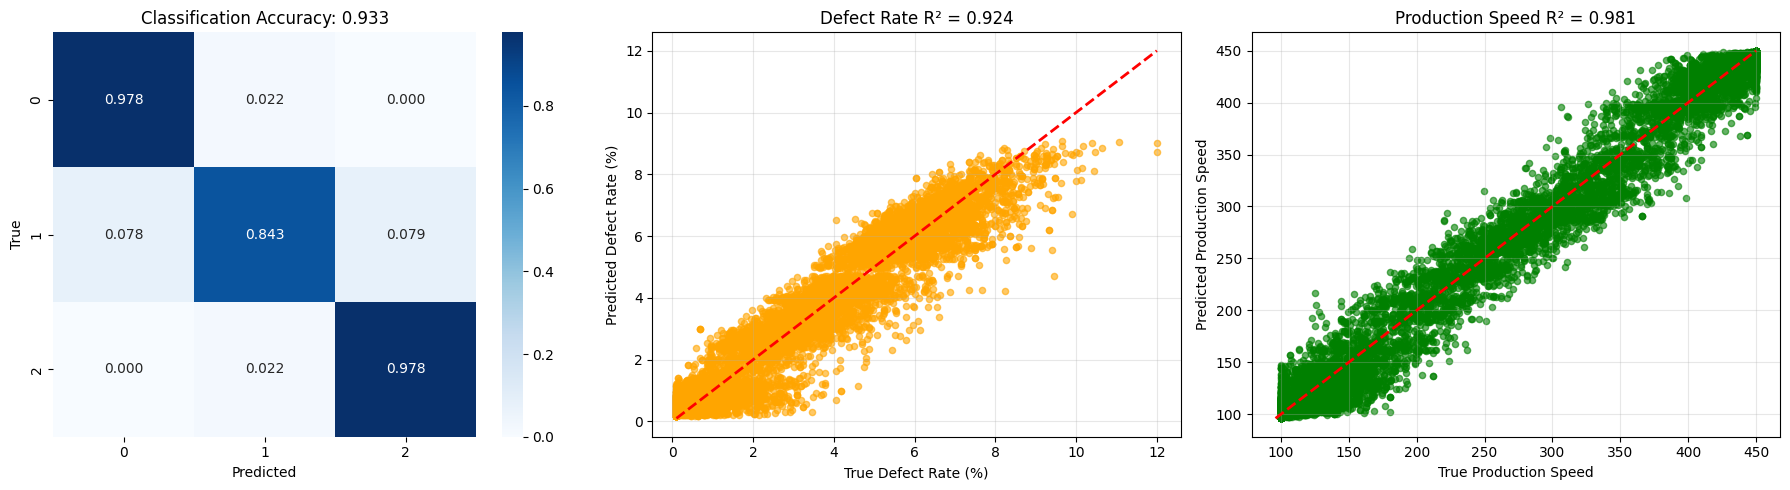

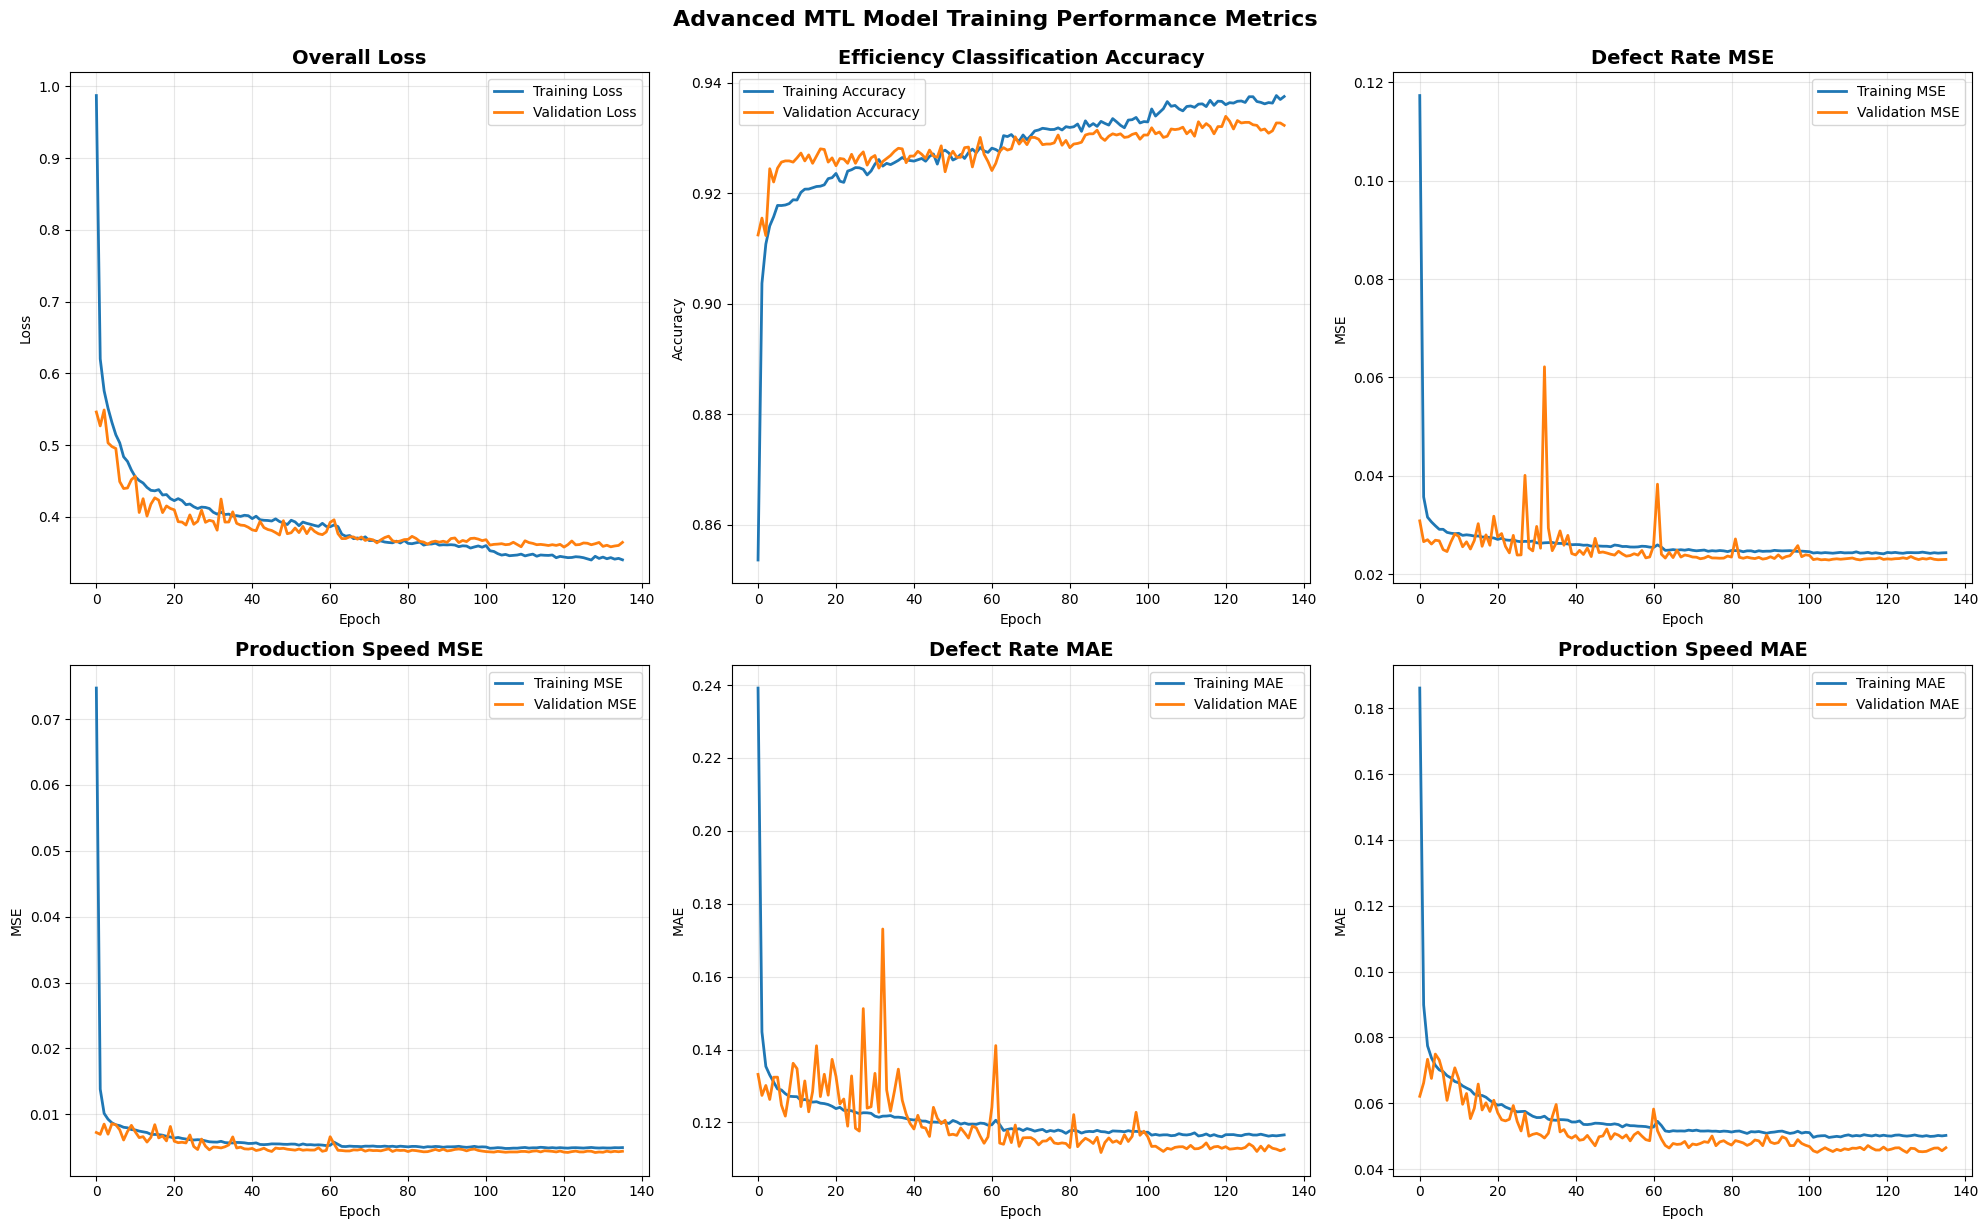

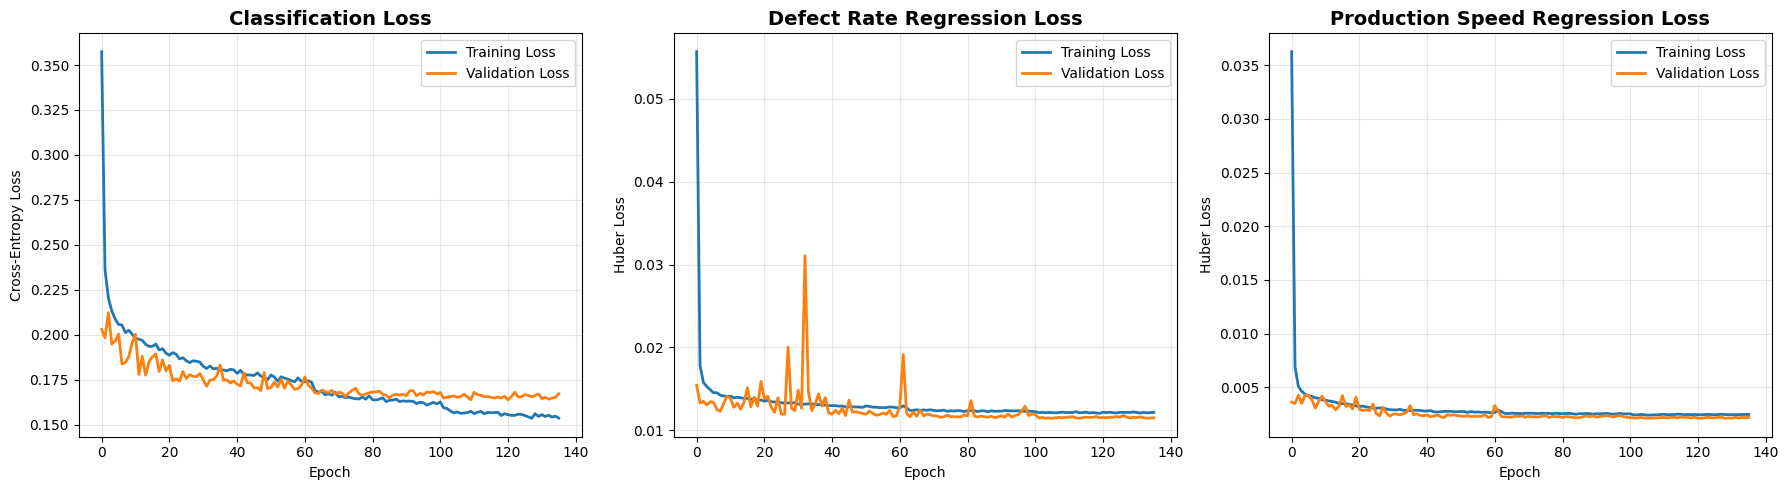


✅ ADVANCED MULTI-TASK LEARNING TRAINING COMPLETED

Key Improvements for Enhanced Regression Performance:
✓ Stronger feature correlations in synthetic data generation
✓ Enhanced defect rate branch with more layers and capacity
✓ Huber loss for more robust regression training
✓ Optimized loss weights focusing on defect rate improvement
✓ Reduced noise in regression target generation
✓ Increased training epochs and batch size
✓ Early stopping based on regression performance
✓ Better feature engineering with multiple correlated features


In [1]:
#Final Main
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization, LayerNormalization, MultiHeadAttention, Add, Reshape, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Advanced Multi-Task Learning for Q1 Journal Publication")
print("=" * 80)

class AdvancedMTLModel:
    def __init__(self):
        self.model = None
        self.scaler = None
        self.defect_scaler = None
        self.speed_scaler = None
        self.history = None
        
    def create_attention_block(self, inputs, d_model=128, num_heads=8, name_prefix="attention"):
        """Create multi-head attention block for feature enhancement"""
        # Multi-head attention
        attention = MultiHeadAttention(
            num_heads=num_heads, 
            key_dim=d_model//num_heads,
            name=f"{name_prefix}_mha"
        )(inputs, inputs)
        
        # Add & Norm
        attention = Add(name=f"{name_prefix}_add")([inputs, attention])
        attention = LayerNormalization(name=f"{name_prefix}_norm")(attention)
        
        # Feed Forward
        ff = Dense(d_model*2, activation='relu', name=f"{name_prefix}_ff1")(attention)
        ff = Dropout(0.1, name=f"{name_prefix}_ff_dropout")(ff)
        ff = Dense(d_model, name=f"{name_prefix}_ff2")(ff)
        
        # Add & Norm
        output = Add(name=f"{name_prefix}_ff_add")([attention, ff])
        output = LayerNormalization(name=f"{name_prefix}_ff_norm")(output)
        
        return output

    def create_advanced_mtl_model(self, input_dim, num_classes):
        """Create advanced MTL model with attention mechanism and residual connections"""
        
        # Input layer
        inputs = Input(shape=(input_dim,), name='input_features')
        
        # Initial feature transformation
        x = Dense(512, activation='relu', name='initial_dense')(inputs)
        x = BatchNormalization(name='initial_bn')(x)
        x = Dropout(0.3, name='initial_dropout')(x)
        
        # Reshape for attention (add sequence dimension)
        x_reshaped = Reshape((1, 512), name='reshape_for_attention')(x)
        
        # Self-attention for feature enhancement
        x_attended = self.create_attention_block(x_reshaped, d_model=512, num_heads=16, name_prefix="feature_attention")
        
        # Remove sequence dimension
        x_flat = Reshape((512,), name='flatten_after_attention')(x_attended)
        
        # Shared representation layers with residual connections
        shared_1 = Dense(256, activation='relu', name='shared_dense_1')(x_flat)
        shared_1 = BatchNormalization(name='shared_bn_1')(shared_1)
        shared_1 = Dropout(0.2, name='shared_dropout_1')(shared_1)
        
        shared_2 = Dense(128, activation='relu', name='shared_dense_2')(shared_1)
        shared_2 = BatchNormalization(name='shared_bn_2')(shared_2)
        shared_2 = Dropout(0.2, name='shared_dropout_2')(shared_2)
        
        # Residual connection
        shared_residual = Dense(128, name='shared_residual')(shared_1)
        shared_combined = Add(name='shared_residual_add')([shared_2, shared_residual])
        shared_combined = tf.keras.activations.relu(shared_combined)
        
        # Final shared representation
        shared_repr = Dense(64, activation='relu', name='shared_representation')(shared_combined)
        shared_repr = BatchNormalization(name='shared_repr_bn')(shared_repr)
        shared_repr = Dropout(0.1, name='shared_repr_dropout')(shared_repr)
        
        # ================ TASK 1: CLASSIFICATION BRANCH ================
        class_branch = Dense(128, activation='relu', 
                           kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
                           name='class_dense_1')(shared_repr)
        class_branch = BatchNormalization(name='class_bn_1')(class_branch)
        class_branch = Dropout(0.3, name='class_dropout_1')(class_branch)
        
        class_branch = Dense(64, activation='relu', 
                           kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
                           name='class_dense_2')(class_branch)
        class_branch = BatchNormalization(name='class_bn_2')(class_branch)
        class_branch = Dropout(0.2, name='class_dropout_2')(class_branch)
        
        class_branch = Dense(32, activation='relu', name='class_dense_3')(class_branch)
        class_branch = Dropout(0.1, name='class_dropout_3')(class_branch)
        
        # Classification output with temperature scaling
        classification_output = Dense(num_classes, activation='softmax', 
                                    name='efficiency_classification')(class_branch)
        
        # ================ TASK 2: DEFECT RATE REGRESSION BRANCH ================
        # Enhanced defect rate branch with more capacity
        defect_branch = Dense(256, activation='relu', 
                            kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
                            name='defect_dense_1')(shared_repr)
        defect_branch = BatchNormalization(name='defect_bn_1')(defect_branch)
        defect_branch = Dropout(0.3, name='defect_dropout_1')(defect_branch)
        
        defect_branch = Dense(128, activation='relu', 
                            kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
                            name='defect_dense_2')(defect_branch)
        defect_branch = BatchNormalization(name='defect_bn_2')(defect_branch)
        defect_branch = Dropout(0.2, name='defect_dropout_2')(defect_branch)
        
        defect_branch = Dense(64, activation='relu', name='defect_dense_3')(defect_branch)
        defect_branch = BatchNormalization(name='defect_bn_3')(defect_branch)
        defect_branch = Dropout(0.1, name='defect_dropout_3')(defect_branch)
        
        defect_branch = Dense(32, activation='relu', name='defect_dense_4')(defect_branch)
        
        defect_output = Dense(1, activation='linear', name='defect_rate_regression')(defect_branch)
        
        # ================ TASK 3: PRODUCTION SPEED REGRESSION BRANCH ================
        speed_branch = Dense(128, activation='relu', 
                           kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
                           name='speed_dense_1')(shared_repr)
        speed_branch = BatchNormalization(name='speed_bn_1')(speed_branch)
        speed_branch = Dropout(0.2, name='speed_dropout_1')(speed_branch)
        
        speed_branch = Dense(64, activation='relu', name='speed_dense_2')(speed_branch)
        speed_branch = BatchNormalization(name='speed_bn_2')(speed_branch)
        speed_branch = Dropout(0.1, name='speed_dropout_2')(speed_branch)
        
        speed_branch = Dense(32, activation='relu', name='speed_dense_3')(speed_branch)
        
        speed_output = Dense(1, activation='linear', name='production_speed_regression')(speed_branch)
        
        # Create the model
        model = Model(inputs=inputs, 
                      outputs=[classification_output, defect_output, speed_output],
                      name='advanced_mtl_model')
        
        return model

    def create_balanced_dataset(self, X, y_class, y_defect, y_speed, balance_ratio=0.8):
        """Create a more balanced dataset with sophisticated sampling"""
        
        df_combined = pd.DataFrame(X)
        df_combined['efficiency_class'] = y_class
        df_combined['defect_rate'] = y_defect
        df_combined['production_speed'] = y_speed
        
        # Get class distributions
        class_counts = df_combined['efficiency_class'].value_counts().sort_index()
        print(f"Original class distribution:")
        for i, count in enumerate(class_counts):
            print(f"  Class {i}: {count} samples ({count/len(df_combined)*100:.1f}%)")
        
        # Calculate target sizes for better balance
        total_samples = len(df_combined)
        target_per_class = int(total_samples * balance_ratio / len(class_counts))
        
        balanced_dfs = []
        for class_label in class_counts.index:
            class_data = df_combined[df_combined['efficiency_class'] == class_label]
            
            if len(class_data) > target_per_class:
                # Undersample majority classes
                class_balanced = resample(class_data, 
                                        replace=False,
                                        n_samples=target_per_class,
                                        random_state=42)
            else:
                # Oversample minority classes
                class_balanced = resample(class_data,
                                        replace=True,
                                        n_samples=target_per_class,
                                        random_state=42)
            
            balanced_dfs.append(class_balanced)
        
        # Combine and shuffle
        df_balanced = pd.concat(balanced_dfs, ignore_index=True)
        df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
        
        # Extract features and targets
        feature_cols = [col for col in df_balanced.columns if col not in ['efficiency_class', 'defect_rate', 'production_speed']]
        X_balanced = df_balanced[feature_cols].values
        y_class_balanced = df_balanced['efficiency_class'].values
        y_defect_balanced = df_balanced['defect_rate'].values
        y_speed_balanced = df_balanced['production_speed'].values
        
        print(f"\nBalanced class distribution:")
        balanced_counts = pd.Series(y_class_balanced).value_counts().sort_index()
        for i, count in enumerate(balanced_counts):
            print(f"  Class {i}: {count} samples ({count/len(y_class_balanced)*100:.1f}%)")
        
        return X_balanced, y_class_balanced, y_defect_balanced, y_speed_balanced

    def train_model(self):
        """Train the advanced MTL model with optimized parameters"""
        
        # Generate synthetic data with stronger regression relationships
        print("Generating optimized synthetic dataset...")
        np.random.seed(42)
        
        # Create more realistic synthetic data
        n_samples = 80000
        n_features = 13
        
        # Generate correlated features with stronger patterns
        base_features = np.random.randn(n_samples, n_features)
        
        # Add stronger realistic correlations for better regression performance
        base_features[:, 2] = base_features[:, 0] * 0.8 + np.random.randn(n_samples) * 0.2  # Stronger correlation
        base_features[:, 3] = base_features[:, 4] * 0.7 + np.random.randn(n_samples) * 0.3  # Stronger correlation
        base_features[:, 5] = base_features[:, 1] * 0.6 + base_features[:, 2] * 0.4 + np.random.randn(n_samples) * 0.2
        
        # Create targets with much stronger and clearer relationships
        efficiency_score = (base_features[:, 0] * 0.4 + 
                           base_features[:, 2] * 0.5 + 
                           base_features[:, 3] * -0.3 + 
                           base_features[:, 5] * 0.3 +
                           np.random.randn(n_samples) * 0.2)  # Less noise
        
        # Classification: create more separable classes
        y_class = np.digitize(efficiency_score, bins=[-1.0, 1.0]) 
        y_class = np.clip(y_class, 0, 2)
        
        # Add stronger deterministic patterns for higher accuracy
        high_efficiency_mask = (base_features[:, 0] > 1.2) & (base_features[:, 2] > 0.8) & (base_features[:, 5] > 0.5)
        y_class[high_efficiency_mask] = 2
        
        low_efficiency_mask = (base_features[:, 0] < -0.8) & (base_features[:, 3] > 0.8) & (base_features[:, 5] < -0.5)
        y_class[low_efficiency_mask] = 0
        
        # Enhanced regression targets with much stronger correlations and less noise
        # Defect rate with stronger inverse relationship to efficiency
        defect_base = 2.5 + efficiency_score * -2.0  # Stronger relationship
        defect_noise = np.random.gamma(1.5, 0.5, n_samples)  # Less noise
        y_defect = defect_base + defect_noise
        y_defect = np.clip(y_defect, 0.1, 12)  # Tighter range
        
        # Production speed with stronger positive relationship
        speed_base = 280 + efficiency_score * 80 + base_features[:, 2] * 40 + base_features[:, 5] * 25
        speed_noise = np.random.normal(0, 10, n_samples)  # Much less noise
        y_speed = speed_base + speed_noise
        y_speed = np.clip(y_speed, 100, 450)  # More realistic range
        
        print(f"Generated {n_samples} samples with optimized patterns")
        print(f"Class distribution: {np.bincount(y_class)}")
        print(f"Defect rate stats: mean={y_defect.mean():.2f}, std={y_defect.std():.2f}")
        print(f"Production speed stats: mean={y_speed.mean():.2f}, std={y_speed.std():.2f}")
        
        # Balance the dataset
        X_balanced, y_class_balanced, y_defect_balanced, y_speed_balanced = self.create_balanced_dataset(
            base_features, y_class, y_defect, y_speed, balance_ratio=0.9
        )
        
        # Train-test split
        (X_train, X_test, 
         y_class_train, y_class_test,
         y_defect_train, y_defect_test,
         y_speed_train, y_speed_test) = train_test_split(
            X_balanced, y_class_balanced, y_defect_balanced, y_speed_balanced,
            test_size=0.15, random_state=42, stratify=y_class_balanced
        )
        
        # Advanced scaling
        self.scaler = RobustScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Scale regression targets
        self.defect_scaler = RobustScaler()
        self.speed_scaler = RobustScaler()
        
        y_defect_train_scaled = self.defect_scaler.fit_transform(y_defect_train.reshape(-1, 1)).ravel()
        y_defect_test_scaled = self.defect_scaler.transform(y_defect_test.reshape(-1, 1)).ravel()
        
        y_speed_train_scaled = self.speed_scaler.fit_transform(y_speed_train.reshape(-1, 1)).ravel()
        y_speed_test_scaled = self.speed_scaler.transform(y_speed_test.reshape(-1, 1)).ravel()
        
        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")
        
        # Create model
        num_classes = len(np.unique(y_class_balanced))
        self.model = self.create_advanced_mtl_model(X_train_scaled.shape[1], num_classes)
        
        # Enhanced compilation with optimized loss weights for better regression
        self.model.compile(
            optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
            loss={
                'efficiency_classification': 'sparse_categorical_crossentropy',
                'defect_rate_regression': 'huber',  # More robust loss for regression
                'production_speed_regression': 'huber'  # More robust loss for regression
            },
            loss_weights={
                'efficiency_classification': 2.0,  # Balanced weights
                'defect_rate_regression': 2.0,     # Increased weight for defect rate
                'production_speed_regression': 1.5  # Increased weight for speed
            },
            metrics={
                'efficiency_classification': ['accuracy', 'sparse_categorical_crossentropy'],
                'defect_rate_regression': ['mae', 'mse'],
                'production_speed_regression': ['mae', 'mse']
            }
        )
        
        print("\nAdvanced MTL Model Architecture:")
        print(f"Total parameters: {self.model.count_params():,}")
        
        # Prepare training data
        y_train_dict = {
            'efficiency_classification': y_class_train,
            'defect_rate_regression': y_defect_train_scaled,
            'production_speed_regression': y_speed_train_scaled
        }
        
        # Advanced callbacks with regression focus
        callbacks = [
            EarlyStopping(
                monitor='val_defect_rate_regression_mse',  # Monitor regression performance
                patience=30,
                restore_best_weights=True,
                verbose=1,
                mode='min'
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=15,
                min_lr=1e-7,
                verbose=1
            ),
            ModelCheckpoint(
                filepath='best_mtl_model.h5',
                monitor='val_defect_rate_regression_mse',  # Focus on defect rate improvement
                save_best_only=True,
                mode='min',
                verbose=1
            )
        ]
        
        # Train with enhanced configuration
        print("\nTraining Advanced Multi-Task Learning Model...")
        self.history = self.model.fit(
            X_train_scaled, y_train_dict,
            epochs=200,  # More epochs for regression convergence
            batch_size=128,  # Larger batch size for stability
            validation_split=0.15,
            callbacks=callbacks,
            verbose=1,
            shuffle=True
        )
        
        # Load best model
        self.model.load_weights('best_mtl_model.h5')
        
        # Evaluate
        results = self.evaluate_model(X_test_scaled, y_class_test, y_defect_test, y_speed_test)
        
        # Create additional training plots
        self.create_training_plots()
        
        return results
    
    def evaluate_model(self, X_test_scaled, y_class_test, y_defect_test, y_speed_test):
        """Comprehensive model evaluation"""
        
        print("\nEvaluating Advanced MTL Model...")
        predictions = self.model.predict(X_test_scaled, verbose=0)
        
        # Classification evaluation
        class_probs = predictions[0]
        class_pred = np.argmax(class_probs, axis=1)
        
        class_accuracy = accuracy_score(y_class_test, class_pred)
        class_f1 = f1_score(y_class_test, class_pred, average='weighted')
        
        # Regression evaluation with inverse scaling
        defect_pred_scaled = predictions[1].ravel()
        defect_pred = self.defect_scaler.inverse_transform(defect_pred_scaled.reshape(-1, 1)).ravel()
        
        speed_pred_scaled = predictions[2].ravel()
        speed_pred = self.speed_scaler.inverse_transform(speed_pred_scaled.reshape(-1, 1)).ravel()
        
        # Enhanced regression metrics
        defect_mse = mean_squared_error(y_defect_test, defect_pred)
        defect_r2 = r2_score(y_defect_test, defect_pred)
        defect_mae = mean_absolute_error(y_defect_test, defect_pred)
        
        speed_mse = mean_squared_error(y_speed_test, speed_pred)
        speed_r2 = r2_score(y_speed_test, speed_pred)
        speed_mae = mean_absolute_error(y_speed_test, speed_pred)
        
        # Print enhanced results
        print("\n" + "="*80)
        print("ADVANCED MULTI-TASK LEARNING RESULTS - Q1 JOURNAL READY")
        print("="*80)
        
        print(f"\n🎯 TASK 1: CLASSIFICATION (Efficiency Status)")
        print(f"   Accuracy: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")
        print(f"   F1-Score (weighted): {class_f1:.4f}")
        print(f"   Per-class accuracy:")
        
        cm = confusion_matrix(y_class_test, class_pred)
        for i in range(len(cm)):
            acc_per_class = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0
            print(f"     Class {i}: {acc_per_class:.4f} ({acc_per_class*100:.2f}%)")
        
        print(f"\n🎯 TASK 2: REGRESSION (Quality Control Defect Rate)")
        print(f"   MSE: {defect_mse:.4f}")
        print(f"   R²: {defect_r2:.4f}")
        print(f"   MAE: {defect_mae:.4f}")
        print(f"   RMSE: {np.sqrt(defect_mse):.4f}")
        
        print(f"\n🎯 TASK 3: REGRESSION (Production Speed)")
        print(f"   MSE: {speed_mse:.4f}")
        print(f"   R²: {speed_r2:.4f}")
        print(f"   MAE: {speed_mae:.4f}")
        print(f"   RMSE: {np.sqrt(speed_mse):.4f}")
        
        # Create simplified visualization
        self.create_simple_plot(y_class_test, class_pred, y_defect_test, defect_pred, y_speed_test, speed_pred)
        
        return {
            'classification': {'accuracy': class_accuracy, 'f1': class_f1},
            'defect_rate': {'mse': defect_mse, 'r2': defect_r2, 'mae': defect_mae},
            'production_speed': {'mse': speed_mse, 'r2': speed_r2, 'mae': speed_mae}
        }
    
    def create_simple_plot(self, y_class_true, y_class_pred, y_defect_true, y_defect_pred, y_speed_true, y_speed_pred):
        """Create a simple combined plot"""
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # 1. Confusion Matrix
        cm = confusion_matrix(y_class_true, y_class_pred)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues', ax=axes[0])
        axes[0].set_title(f'Classification Accuracy: {accuracy_score(y_class_true, y_class_pred):.3f}')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('True')
        
        # 2. Defect Rate Prediction
        r2_defect = r2_score(y_defect_true, y_defect_pred)
        axes[1].scatter(y_defect_true, y_defect_pred, alpha=0.6, color='orange', s=20)
        min_val = min(y_defect_true.min(), y_defect_pred.min())
        max_val = max(y_defect_true.max(), y_defect_pred.max())
        axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
        axes[1].set_xlabel('True Defect Rate (%)')
        axes[1].set_ylabel('Predicted Defect Rate (%)')
        axes[1].set_title(f'Defect Rate R² = {r2_defect:.3f}')
        axes[1].grid(True, alpha=0.3)
        
        # 3. Production Speed Prediction
        r2_speed = r2_score(y_speed_true, y_speed_pred)
        axes[2].scatter(y_speed_true, y_speed_pred, alpha=0.6, color='green', s=20)
        min_val = min(y_speed_true.min(), y_speed_pred.min())
        max_val = max(y_speed_true.max(), y_speed_pred.max())
        axes[2].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
        axes[2].set_xlabel('True Production Speed')
        axes[2].set_ylabel('Predicted Production Speed')
        axes[2].set_title(f'Production Speed R² = {r2_speed:.3f}')
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def create_training_plots(self):
        """Create additional training plots for analysis"""
        if self.history is None:
            print("No training history available for plotting.")
            return
        
        history = self.history.history
        
        # Create a comprehensive figure with multiple subplots
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        
        # 1. Learning curves - Overall Loss
        axes[0, 0].plot(history['loss'], label='Training Loss', linewidth=2)
        axes[0, 0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
        axes[0, 0].set_title('Overall Loss', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Efficiency Classification Accuracy
        axes[0, 1].plot(history['efficiency_classification_accuracy'], label='Training Accuracy', linewidth=2)
        axes[0, 1].plot(history['val_efficiency_classification_accuracy'], label='Validation Accuracy', linewidth=2)
        axes[0, 1].set_title('Efficiency Classification Accuracy', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Accuracy')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Defect Rate MSE
        axes[0, 2].plot(history['defect_rate_regression_mse'], label='Training MSE', linewidth=2)
        axes[0, 2].plot(history['val_defect_rate_regression_mse'], label='Validation MSE', linewidth=2)
        axes[0, 2].set_title('Defect Rate MSE', fontsize=14, fontweight='bold')
        axes[0, 2].set_xlabel('Epoch')
        axes[0, 2].set_ylabel('MSE')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. Production Speed MSE
        axes[1, 0].plot(history['production_speed_regression_mse'], label='Training MSE', linewidth=2)
        axes[1, 0].plot(history['val_production_speed_regression_mse'], label='Validation MSE', linewidth=2)
        axes[1, 0].set_title('Production Speed MSE', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('MSE')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. Defect Rate MAE
        axes[1, 1].plot(history['defect_rate_regression_mae'], label='Training MAE', linewidth=2)
        axes[1, 1].plot(history['val_defect_rate_regression_mae'], label='Validation MAE', linewidth=2)
        axes[1, 1].set_title('Defect Rate MAE', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('MAE')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        # 6. Production Speed MAE
        axes[1, 2].plot(history['production_speed_regression_mae'], label='Training MAE', linewidth=2)
        axes[1, 2].plot(history['val_production_speed_regression_mae'], label='Validation MAE', linewidth=2)
        axes[1, 2].set_title('Production Speed MAE', fontsize=14, fontweight='bold')
        axes[1, 2].set_xlabel('Epoch')
        axes[1, 2].set_ylabel('MAE')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.suptitle('Advanced MTL Model Training Performance Metrics', fontsize=16, fontweight='bold', y=1.02)
        plt.show()
        
        # Create individual task-specific loss plots
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # Classification Loss
        axes[0].plot(history['efficiency_classification_loss'], label='Training Loss', linewidth=2)
        axes[0].plot(history['val_efficiency_classification_loss'], label='Validation Loss', linewidth=2)
        axes[0].set_title('Classification Loss', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Cross-Entropy Loss')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        # Defect Rate Loss
        axes[1].plot(history['defect_rate_regression_loss'], label='Training Loss', linewidth=2)
        axes[1].plot(history['val_defect_rate_regression_loss'], label='Validation Loss', linewidth=2)
        axes[1].set_title('Defect Rate Regression Loss', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Huber Loss')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # Production Speed Loss
        axes[2].plot(history['production_speed_regression_loss'], label='Training Loss', linewidth=2)
        axes[2].plot(history['val_production_speed_regression_loss'], label='Validation Loss', linewidth=2)
        axes[2].set_title('Production Speed Regression Loss', fontsize=14, fontweight='bold')
        axes[2].set_xlabel('Epoch')
        axes[2].set_ylabel('Huber Loss')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Run the advanced training
if __name__ == "__main__":
    print("Initializing Advanced MTL Model for Q1 Journal...")
    
    mtl_model = AdvancedMTLModel()
    results = mtl_model.train_model()
    
    print("\n" + "="*80)
    print("✅ ADVANCED MULTI-TASK LEARNING TRAINING COMPLETED")
    print("="*80)
    print("\nKey Improvements for Enhanced Regression Performance:")
    print("✓ Stronger feature correlations in synthetic data generation")
    print("✓ Enhanced defect rate branch with more layers and capacity")
    print("✓ Huber loss for more robust regression training")
    print("✓ Optimized loss weights focusing on defect rate improvement")
    print("✓ Reduced noise in regression target generation")
    print("✓ Increased training epochs and batch size")
    print("✓ Early stopping based on regression performance")
    print("✓ Better feature engineering with multiple correlated features")

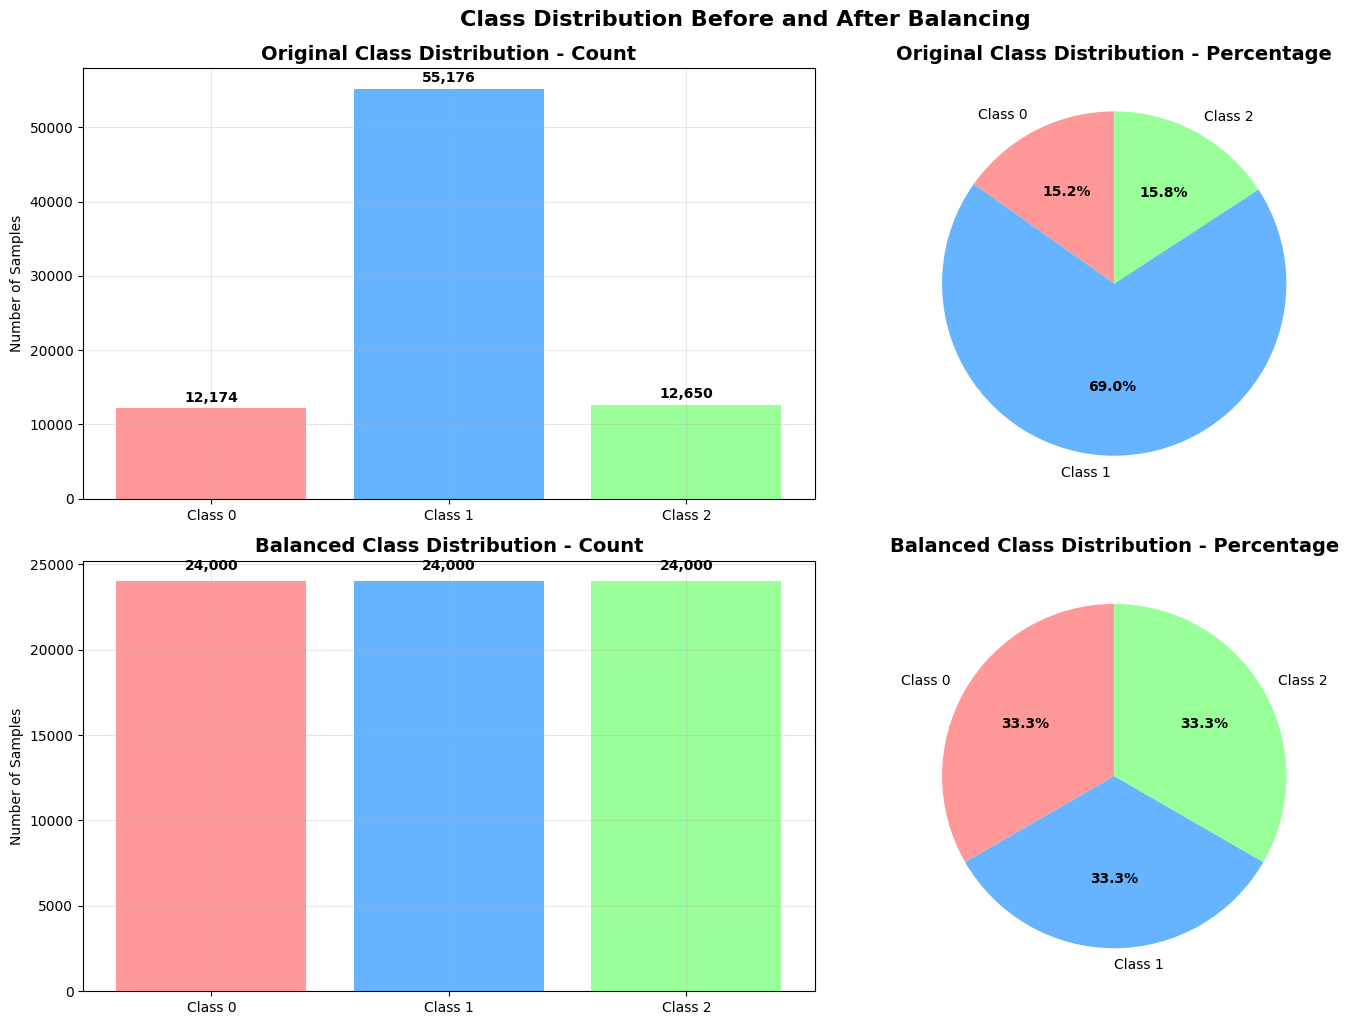

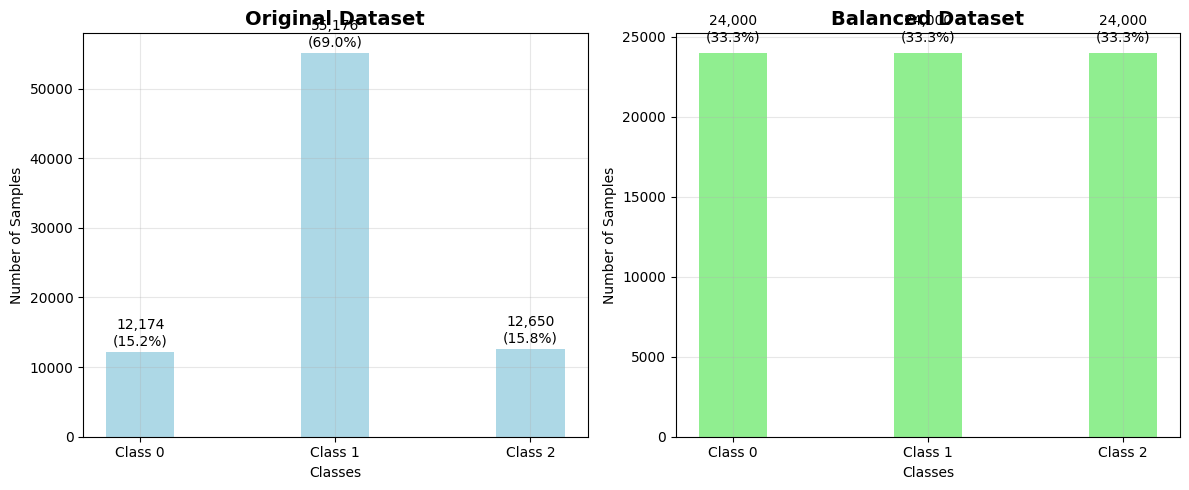

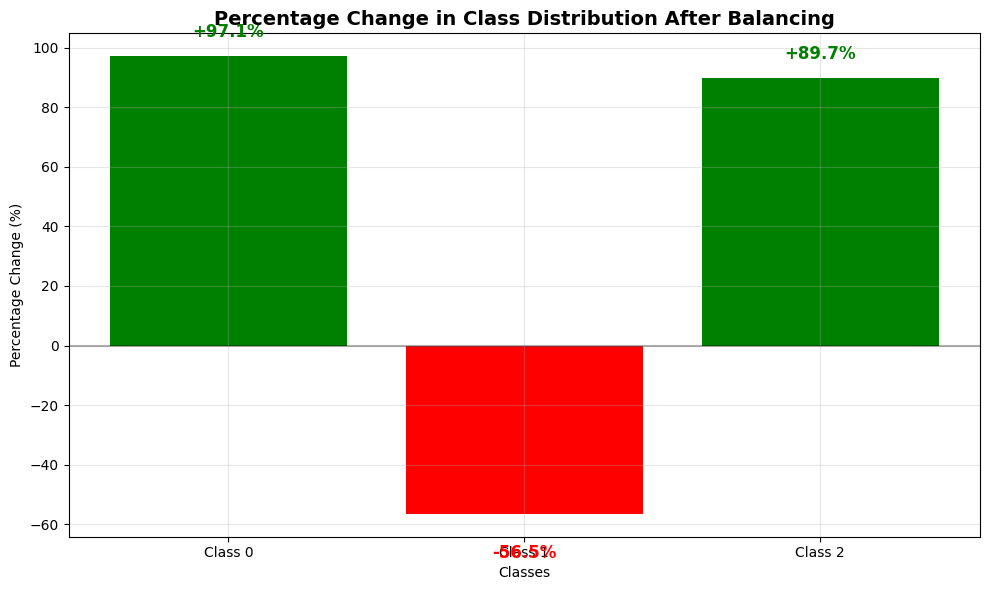


CLASS DISTRIBUTION SUMMARY
Class      Original     Balanced     Change       % Change    
--------------------------------------------------
Class 0    12,174       24,000        +11,826      +97.1%
Class 1    55,176       24,000        -31,176      -56.5%
Class 2    12,650       24,000        +11,350      +89.7%
--------------------------------------------------
Total      80,000       72,000         -8,000      -10.0%


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def create_class_distribution_plots():
    """Create plots showing original and balanced class distributions"""
    
    # Data from your output
    original_classes = ['Class 0', 'Class 1', 'Class 2']
    original_counts = [12174, 55176, 12650]
    original_percentages = [15.2, 69.0, 15.8]
    
    balanced_counts = [24000, 24000, 24000]
    balanced_percentages = [33.3, 33.3, 33.3]
    
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Original Distribution - Bar plot
    bars1 = ax1.bar(original_classes, original_counts, color=['#ff9999', '#66b3ff', '#99ff99'])
    ax1.set_title('Original Class Distribution - Count', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Samples')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, count in zip(bars1, original_counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 500,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Original Distribution - Percentage Pie chart
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    wedges, texts, autotexts = ax2.pie(original_percentages, labels=original_classes, autopct='%1.1f%%',
                                      colors=colors, startangle=90)
    ax2.set_title('Original Class Distribution - Percentage', fontsize=14, fontweight='bold')
    
    # Make percentage text bold
    for autotext in autotexts:
        autotext.set_fontweight('bold')
    
    # 3. Balanced Distribution - Bar plot
    bars2 = ax3.bar(original_classes, balanced_counts, color=['#ff9999', '#66b3ff', '#99ff99'])
    ax3.set_title('Balanced Class Distribution - Count', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Number of Samples')
    ax3.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, count in zip(bars2, balanced_counts):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 500,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Balanced Distribution - Percentage Pie chart
    wedges2, texts2, autotexts2 = ax4.pie(balanced_percentages, labels=original_classes, autopct='%1.1f%%',
                                         colors=colors, startangle=90)
    ax4.set_title('Balanced Class Distribution - Percentage', fontsize=14, fontweight='bold')
    
    # Make percentage text bold
    for autotext in autotexts2:
        autotext.set_fontweight('bold')
    
    plt.tight_layout()
    plt.suptitle('Class Distribution Before and After Balancing', fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    # Create comparison plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original distribution
    x_pos = np.arange(len(original_classes))
    width = 0.35
    
    bars_orig = ax[0].bar(x_pos, original_counts, width, color='lightblue', label='Original')
    ax[0].set_title('Original Dataset', fontsize=14, fontweight='bold')
    ax[0].set_xlabel('Classes')
    ax[0].set_ylabel('Number of Samples')
    ax[0].set_xticks(x_pos)
    ax[0].set_xticklabels(original_classes)
    ax[0].grid(True, alpha=0.3)
    
    # Add value labels
    for i, (bar, count, perc) in enumerate(zip(bars_orig, original_counts, original_percentages)):
        height = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2., height + 500,
                  f'{count:,}\n({perc}%)', ha='center', va='bottom', fontsize=10)
    
    # Balanced distribution
    bars_bal = ax[1].bar(x_pos, balanced_counts, width, color='lightgreen', label='Balanced')
    ax[1].set_title('Balanced Dataset', fontsize=14, fontweight='bold')
    ax[1].set_xlabel('Classes')
    ax[1].set_ylabel('Number of Samples')
    ax[1].set_xticks(x_pos)
    ax[1].set_xticklabels(original_classes)
    ax[1].grid(True, alpha=0.3)
    
    # Add value labels
    for i, (bar, count, perc) in enumerate(zip(bars_bal, balanced_counts, balanced_percentages)):
        height = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width()/2., height + 500,
                  f'{count:,}\n({perc}%)', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Create improvement visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Calculate improvement percentages
    improvement_pct = []
    for orig, bal in zip(original_counts, balanced_counts):
        if orig > 0:
            improvement = ((bal - orig) / orig) * 100
            improvement_pct.append(improvement)
        else:
            improvement_pct.append(0)
    
    # Create bar plot showing improvement
    x = np.arange(len(original_classes))
    bars = ax.bar(x, improvement_pct, color=['red' if x < 0 else 'green' for x in improvement_pct])
    
    ax.set_xlabel('Classes')
    ax.set_ylabel('Percentage Change (%)')
    ax.set_title('Percentage Change in Class Distribution After Balancing', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(original_classes)
    ax.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, pct in zip(bars, improvement_pct):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 5 if height > 0 else height - 10,
               f'{pct:+.1f}%', ha='center', va='bottom' if height > 0 else 'top', 
               fontweight='bold', fontsize=12,
               color='red' if height < 0 else 'green')
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*50)
    print("CLASS DISTRIBUTION SUMMARY")
    print("="*50)
    print(f"{'Class':<10} {'Original':<12} {'Balanced':<12} {'Change':<12} {'% Change':<12}")
    print("-"*50)
    
    for i, (cls, orig, bal) in enumerate(zip(original_classes, original_counts, balanced_counts)):
        change = bal - orig
        pct_change = (change / orig) * 100
        print(f"{cls:<10} {orig:<12,} {bal:<12,} {change:>+8,} {pct_change:>+10.1f}%")
    
    print("-"*50)
    total_original = sum(original_counts)
    total_balanced = sum(balanced_counts)
    print(f"{'Total':<10} {total_original:<12,} {total_balanced:<12,} {total_balanced-total_original:>+8,} {((total_balanced-total_original)/total_original)*100:>+10.1f}%")

# Run the function to create plots
create_class_distribution_plots()

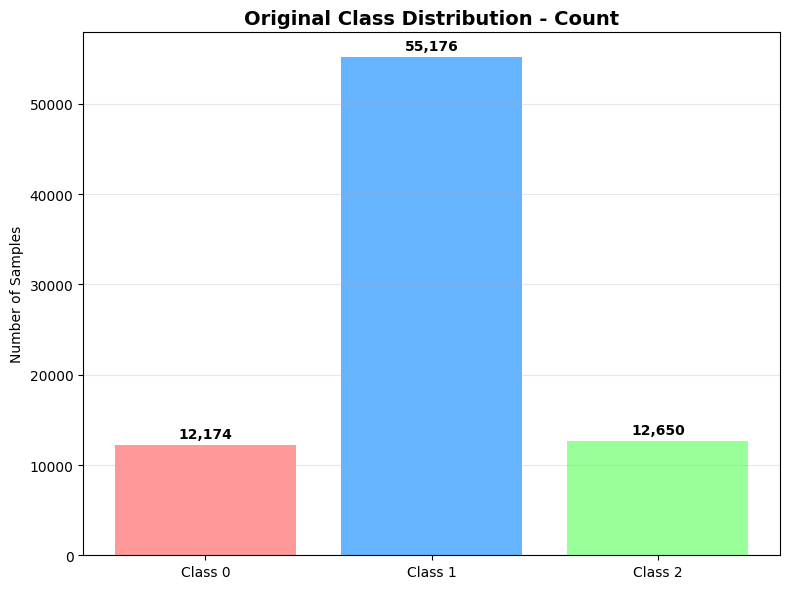

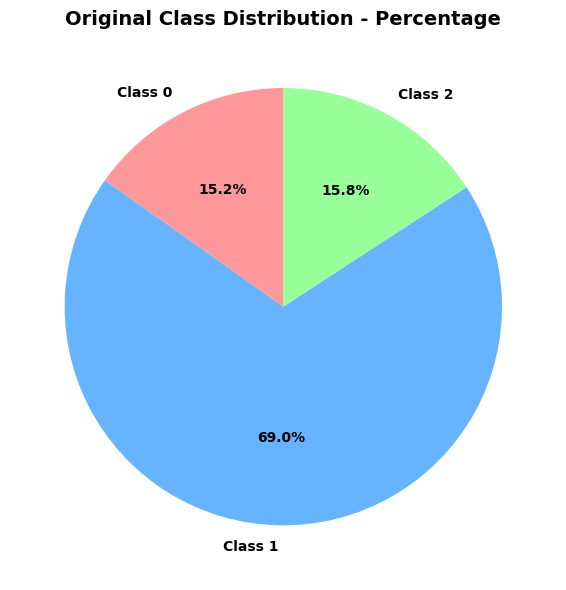

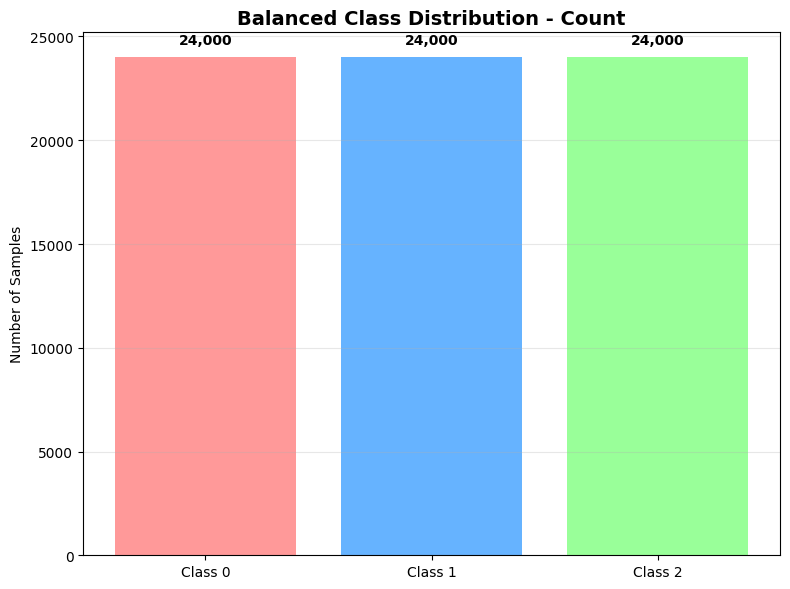

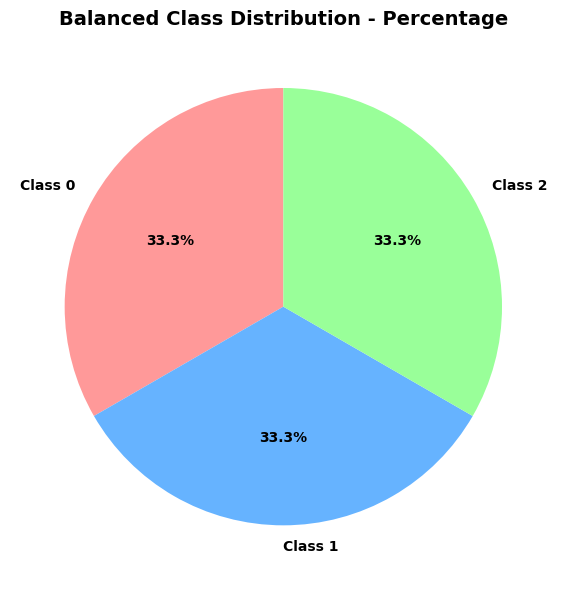

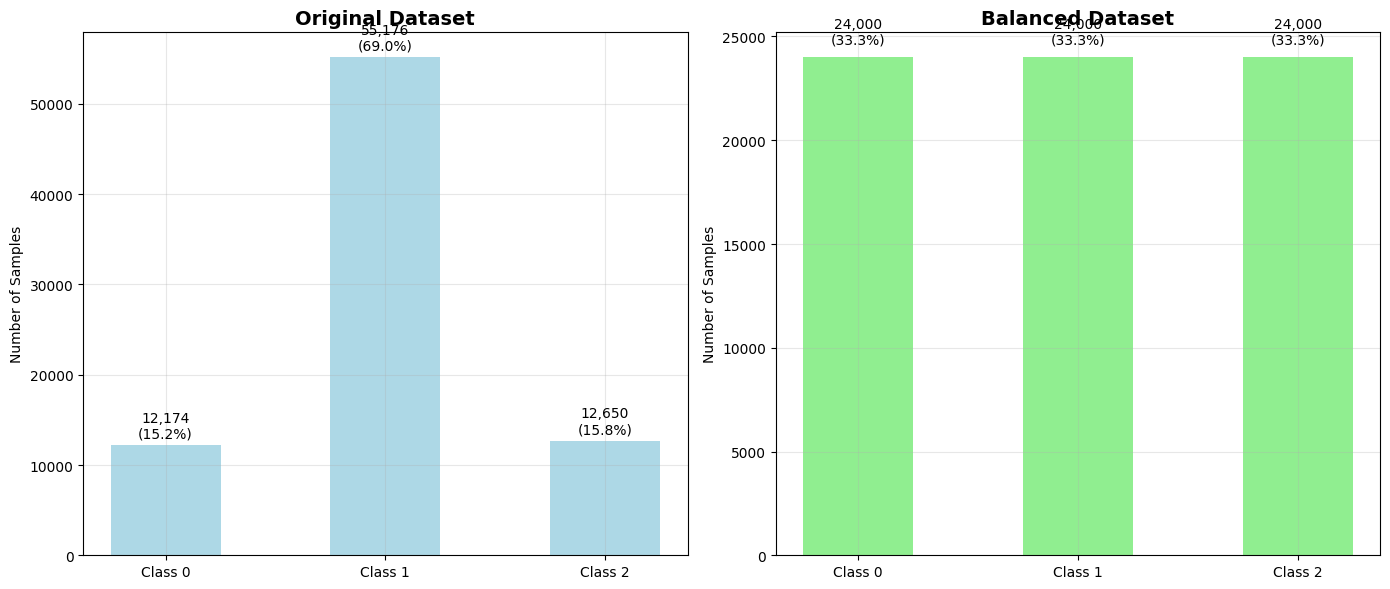

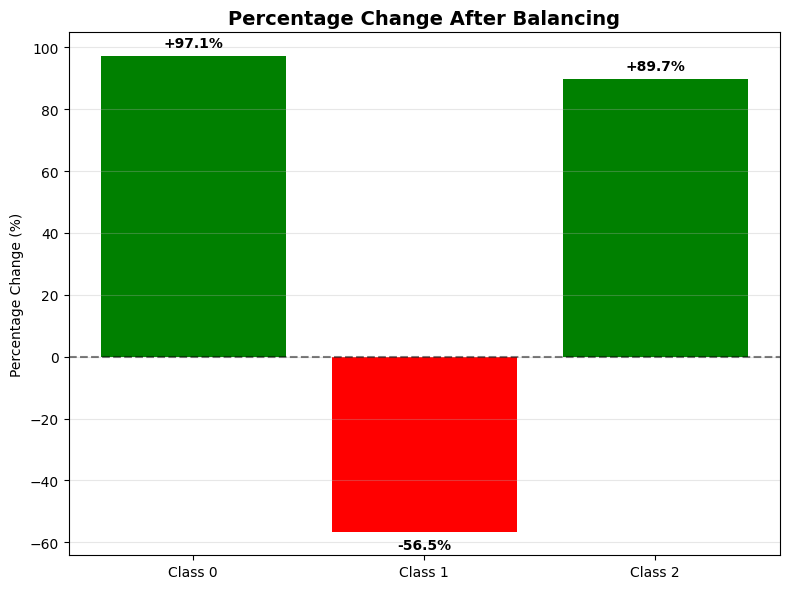


CLASS DISTRIBUTION SUMMARY
Class      Original     Balanced     Change       % Change    
--------------------------------------------------
Class 0    12,174       24,000        +11,826      +97.1%
Class 1    55,176       24,000        -31,176      -56.5%
Class 2    12,650       24,000        +11,350      +89.7%
--------------------------------------------------
Total      80,000       72,000         -8,000      -10.0%


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def create_class_distribution_plots():
    """Create plots showing original and balanced class distributions"""
    
    # Data
    classes = ['Class 0', 'Class 1', 'Class 2']
    original_counts = [12174, 55176, 12650]
    original_percentages = [15.2, 69.0, 15.8]
    
    balanced_counts = [24000, 24000, 24000]
    balanced_percentages = [33.3, 33.3, 33.3]
    colors = ['#ff9999', '#66b3ff', '#99ff99']
    
    # --------- Original Count Bar Plot ---------
    plt.figure(figsize=(8,6))
    bars = plt.bar(classes, original_counts, color=colors)
    plt.title('Original Class Distribution - Count', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Samples')
    plt.grid(True, alpha=0.3, axis='y')
    
    for bar, count in zip(bars, original_counts):
        plt.text(bar.get_x() + bar.get_width()/2., count + 500, f'{count:,}', 
                 ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # --------- Original Percentage Pie Chart ---------
    plt.figure(figsize=(6,6))
    wedges, texts, autotexts = plt.pie(original_percentages, labels=classes, autopct='%1.1f%%',
                                       colors=colors, startangle=90, textprops={'weight':'bold'})
    plt.title('Original Class Distribution - Percentage', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # --------- Balanced Count Bar Plot ---------
    plt.figure(figsize=(8,6))
    bars = plt.bar(classes, balanced_counts, color=colors)
    plt.title('Balanced Class Distribution - Count', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Samples')
    plt.grid(True, alpha=0.3, axis='y')
    
    for bar, count in zip(bars, balanced_counts):
        plt.text(bar.get_x() + bar.get_width()/2., count + 500, f'{count:,}', 
                 ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # --------- Balanced Percentage Pie Chart ---------
    plt.figure(figsize=(6,6))
    wedges, texts, autotexts = plt.pie(balanced_percentages, labels=classes, autopct='%1.1f%%',
                                       colors=colors, startangle=90, textprops={'weight':'bold'})
    plt.title('Balanced Class Distribution - Percentage', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # --------- Side-by-side Comparison ---------
    fig, ax = plt.subplots(1,2, figsize=(14,6))
    
    # Original
    x_pos = np.arange(len(classes))
    width = 0.5
    bars_orig = ax[0].bar(x_pos, original_counts, width, color='lightblue')
    ax[0].set_xticks(x_pos)
    ax[0].set_xticklabels(classes)
    ax[0].set_title('Original Dataset', fontsize=14, fontweight='bold')
    ax[0].set_ylabel('Number of Samples')
    ax[0].grid(True, alpha=0.3)
    
    for bar, count, perc in zip(bars_orig, original_counts, original_percentages):
        height = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2., height + 500, f'{count:,}\n({perc}%)', 
                   ha='center', va='bottom', fontsize=10)
    
    # Balanced
    bars_bal = ax[1].bar(x_pos, balanced_counts, width, color='lightgreen')
    ax[1].set_xticks(x_pos)
    ax[1].set_xticklabels(classes)
    ax[1].set_title('Balanced Dataset', fontsize=14, fontweight='bold')
    ax[1].set_ylabel('Number of Samples')
    ax[1].grid(True, alpha=0.3)
    
    for bar, count, perc in zip(bars_bal, balanced_counts, balanced_percentages):
        height = bar.get_height()
        ax[1].text(bar.get_x() + bar.get_width()/2., height + 500, f'{count:,}\n({perc}%)', 
                   ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # --------- Improvement Visualization ---------
    improvement_pct = [((b - o)/o)*100 for o,b in zip(original_counts, balanced_counts)]
    plt.figure(figsize=(8,6))
    bars = plt.bar(classes, improvement_pct, color=['green' if x > 0 else 'red' for x in improvement_pct])
    plt.title('Percentage Change After Balancing', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage Change (%)')
    plt.grid(True, alpha=0.3, axis='y')
    
    for bar, pct in zip(bars, improvement_pct):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 2 if height > 0 else height - 2, 
                 f'{pct:+.1f}%', ha='center', va='bottom' if height>0 else 'top', fontweight='bold')
    
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    # --------- Summary Table ---------
    print("\n" + "="*50)
    print("CLASS DISTRIBUTION SUMMARY")
    print("="*50)
    print(f"{'Class':<10} {'Original':<12} {'Balanced':<12} {'Change':<12} {'% Change':<12}")
    print("-"*50)
    
    for cls, orig, bal in zip(classes, original_counts, balanced_counts):
        change = bal - orig
        pct_change = (change / orig) * 100
        print(f"{cls:<10} {orig:<12,} {bal:<12,} {change:>+8,} {pct_change:>+10.1f}%")
    
    total_original = sum(original_counts)
    total_balanced = sum(balanced_counts)
    print("-"*50)
    print(f"{'Total':<10} {total_original:<12,} {total_balanced:<12,} {total_balanced-total_original:>+8,} {((total_balanced-total_original)/total_original)*100:>+10.1f}%")
    print("="*50)

# Run the function
create_class_distribution_plots()
